# Google Play Store Data 
### Complete EDA Analysis from Beginner to Advance Level
**Date : 1 May 2025**

# About Dataset 

> **Description**\
> The dataset is downloaded from the following link of Kaggle [Google PlayStore Dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2.Data Loading and Exploration | Cleaning 

In [2]:
df = pd.read_csv("../data/googleplaystore.csv")

- Lets have a look on top 5 rows of data 

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Important Things to Know 

In [4]:
# Set Option to maximum rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Hide all Warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
print(f"Columns Names : {df.columns}")

Columns Names : Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [6]:
print(f"The Number of Rows in the dataset is: {df.shape[0]}")
print(f"The Number of Columns in the dataset is: {df.shape[1]}")

The Number of Rows in the dataset is: 10841
The Number of Columns in the dataset is: 13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


- Lets convert size column from object type to numerical type

In [9]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
### Observation : 

    1."Varies with Device"
    2.M
    3.k
---

In [10]:
df['Size'].isnull().sum()

np.int64(0)

- No Missing Values in the Size , We are good to go

Verify the Number of Values and 3 different kind of values

In [11]:
print(f"Size in MB : {df["Size"].loc[df["Size"].str.contains("M")].count()}")
print(f"Size in KB : {df["Size"].loc[df["Size"].str.contains("k")].count()}")
print(f"Size in Varies with device : {df["Size"].loc[df["Size"].str.contains("Varies with device")].count()}")

Size in MB : 8830
Size in KB : 316
Size in Varies with device : 1695


In [12]:
len(df)

10841

In [13]:
8830+316+1695

10841

In [14]:
# Convert whole size to bytes 
# lets define a function 
def convert_size(size):
    if isinstance(size,str):
        if "k" in size:
            return float(size.replace("k",""))*1024
        elif "M" in size:
            return float(size.replace("M",""))*1024*1024
        elif "Varies with device" in size:
            return np.nan
    return size 


In [15]:
# Lets apply the function to the size column
df['Size'] = df['Size'].apply(convert_size)

In [16]:
df.rename(columns={"Size":"Size_in_Bytes"},inplace=True)

In [17]:
df['Size_in_Mb'] = df['Size_in_Bytes'].apply(lambda x:x/(1024*1024))

In [18]:
df.head(5)

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


# 2. Lets Encode installs column 

In [19]:
# check null values and value count and unique values
print(f"Null Values in Installs : {df['Installs'].isnull().sum()}")
print(f"Unique Values in Installs : {df['Installs'].unique()}")
print(f"Value Counts in Installs : {df['Installs'].value_counts()}")

Null Values in Installs : 0
Unique Values in Installs : ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']
Value Counts in Installs : Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64


- As we have no missing values in the installs column
- Now we will remove the commas and plus sign from the installs column and convert it to int type
  
1.Remove comma\
2.Remove + sign\
3.Convert to int

In [20]:
df['Installs'] = df['Installs'].apply(lambda x:x.replace('+','') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x:x.replace(',','') if ',' in str(x) else x)


In [21]:
df['Installs'] = df['Installs'].apply(lambda x:int(x))

In [22]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

# 3.Lets Encode Price Column

- In Price Column , we have to remove $ sign and convert it to float


In [23]:
# checking the count of $ values in price column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum() 

np.int64(800)

In [24]:
# checking the count of 0 values in price column but not having $ sign in it 
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum() 

np.int64(10041)

In [25]:
# remove $ sign from price column by replace method
df['Price'] = df['Price'].apply(lambda x:x.replace('$','') if '$' in str(x) else x)

In [30]:
df['Price'].value_counts() # checking the price column after applying the replace method

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

In [45]:
df['Price']=df['Price'].apply(lambda x:float(x))


In [150]:
df['Price'].dtype

dtype('float64')

In [ ]:
print(f"Min Price : {df['Price'].min()}")
print(f"Max Price : {df['Price'].max()}")
# print(f"Average Price : {df['Price'].mean()}")

Min Price : 0.0
Max Price : 400.0
Average Price : 1.0315609897544944


# 2.1 Descriptive Statistics

In [48]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


# Missing Values 

In [51]:
df.isnull().sum()# checking the null values in price column

App                  0
Category             0
Rating            1474
Reviews              0
Size_in_Bytes     1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
Size_in_Mb        1695
dtype: int64

In [52]:
df.isnull().sum().sort_values(ascending=False)  # checking the null values in price column

Size_in_Bytes     1695
Size_in_Mb        1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
Genres               1
Reviews              0
App                  0
Category             0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [54]:
# percentage of null values in each column
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False) # checking the null values in price column

Size_in_Bytes     15.64
Size_in_Mb        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Type               0.01
Genres             0.01
Reviews            0.00
App                0.00
Category           0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

In [59]:
missing_values = df.isnull()# checking the null values in price column

<Axes: >

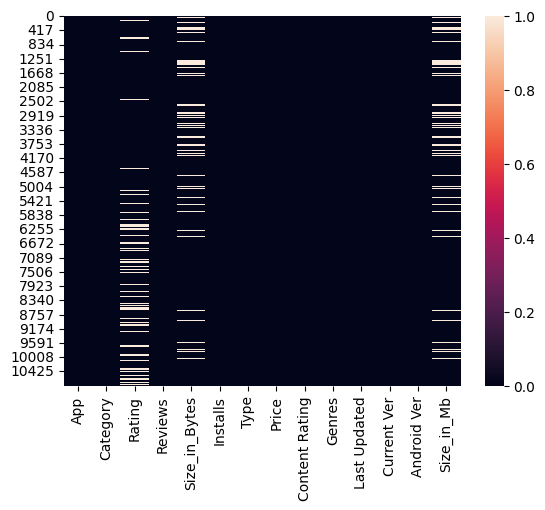

In [63]:
plt.Figure(figsize=(20,10))
sns.heatmap(missing_values)

<Axes: >

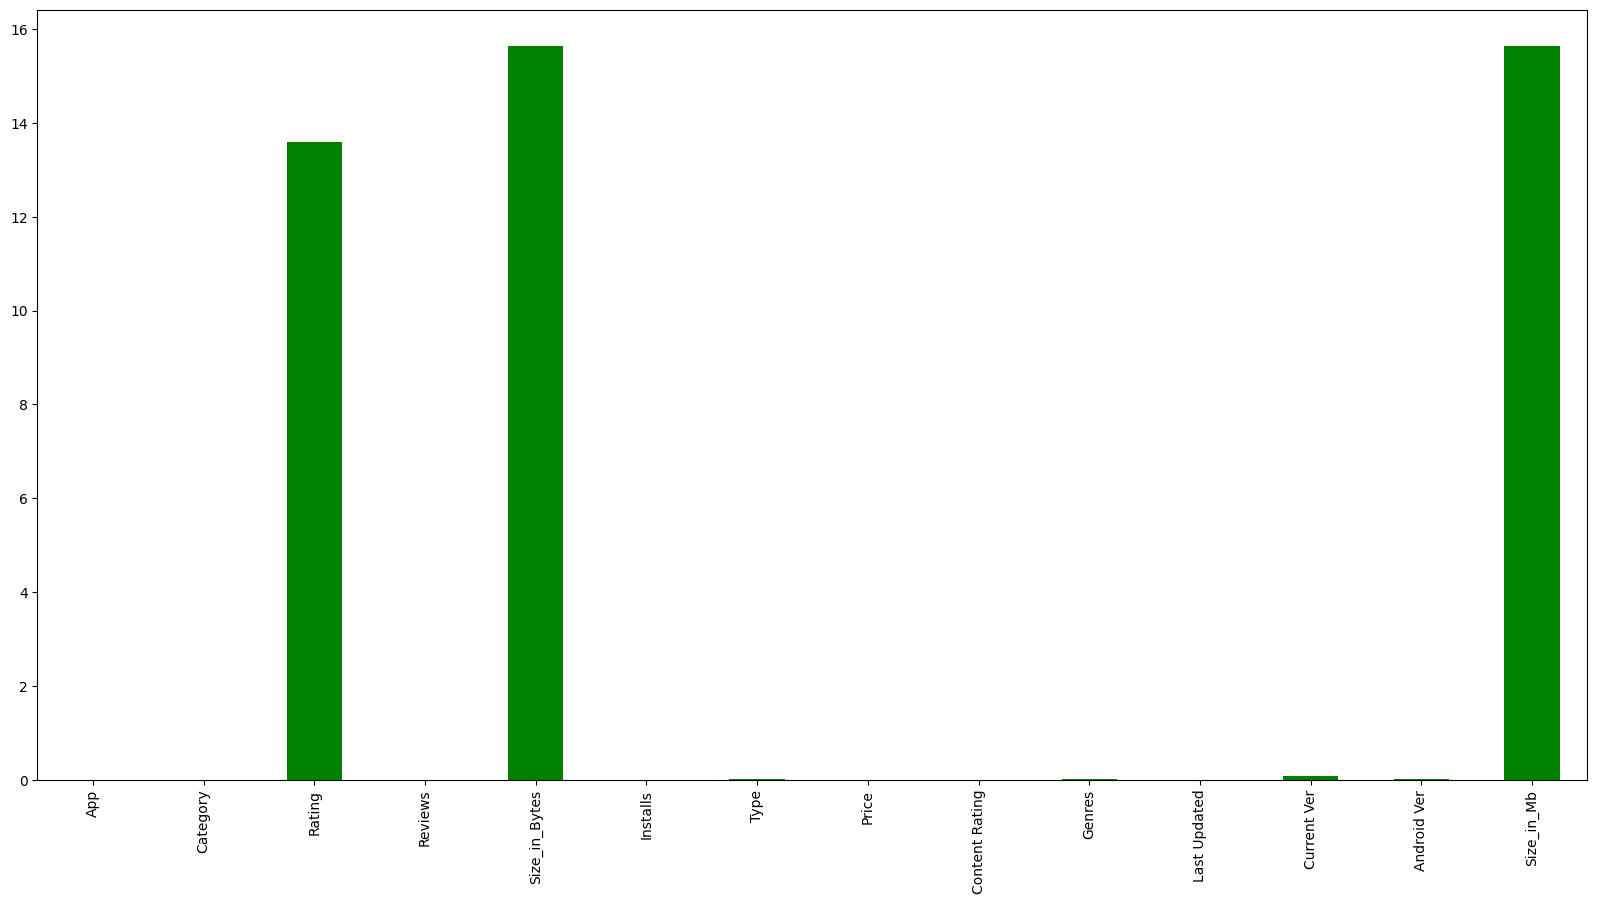

In [ ]:
# make barplot with percentage of null values in each column
plt.figure(figsize=(20,10)) # set the figure size
missing_percent = df.isnull().sum()/df.shape[0]*100 # checking the null values in price column
missing_percent.plot(kind='bar', color='Green')# green color of barplot

<Axes: >

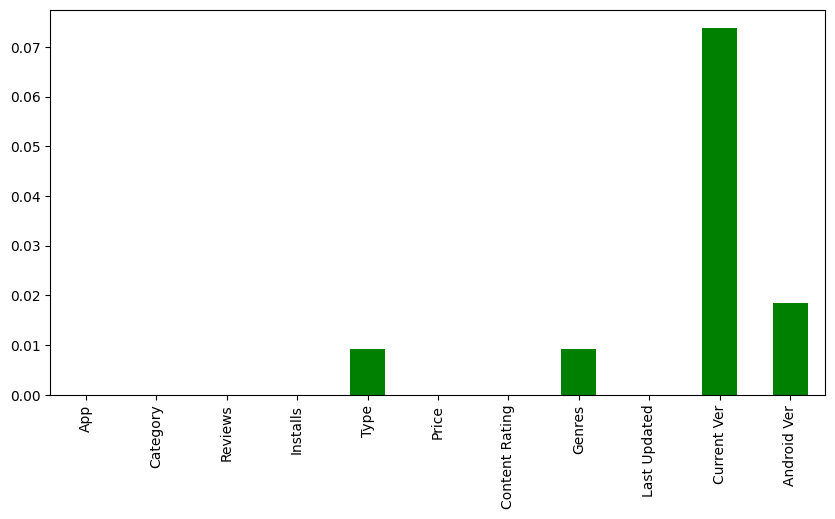

In [72]:
plt.figure(figsize=(10,5)) # set the figure size
missing_percent = df.isnull().sum()/df.shape[0]*100 # checking the null values in price column
missing_percent[missing_percent<1].plot(kind='bar', color='Green')# green color of barplot

<Axes: >

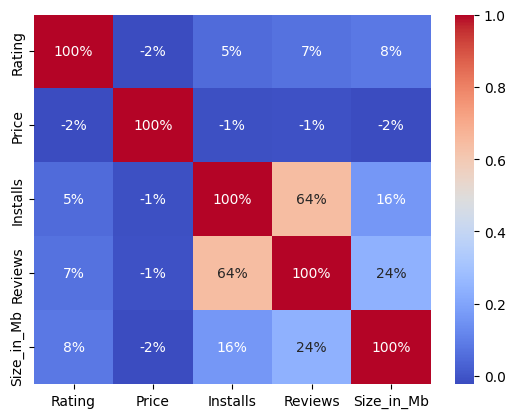

In [78]:
# make correlation matrix with heatmap
plt.Figure(figsize=(16,10))
numeric_columns = ['Rating','Price','Installs','Reviews','Size_in_Mb']
corr = df[numeric_columns].corr() # finding the correlation between the numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.0%') # make heatmap with correlation matrix


In [81]:
round(corr,2) # finding the correlation between the numeric columns

,Rating,Price,Installs,Reviews,Size_in_Mb
Rating,1.00,-0.02,0.05,0.07,0.08
Price,-0.02,1.00,-0.01,-0.01,-0.02
Installs,0.05,-0.01,1.00,0.64,0.16
Reviews,0.07,-0.01,0.64,1.00,0.24
Size_in_Mb,0.08,-0.02,0.16,0.24,1.00


In [ ]:
# we can calculate pearson correlation coefficient using scipy.stats.pearsonr

from scipy import stats
# cleaning the data for pearson correlation coefficient
df_clean = df.dropna()
# find the pearson correlation coefficient between rating and installs
pearsonr, _ =stats.pearsonr(df_clean['Reviews'],df_clean['Installs']) # finding the correlation between the numeric columns

print(f"Pearson Correlation : {pearsonr:.3f}") 
print(f"Length of Rows after cleaning:{len(df_clean)}")

Pearson Correlation : 0.626
Length of Rows after cleaning:7723


In [87]:
df.dropna(subset=['Current Ver','Android Ver','Genres','Type','Category'], inplace=True) # drop the rows with null values in rating column

In [88]:
print(f"Length of Rows after cleaning:{len(df)}")

Length of Rows after cleaning:10829


In [90]:
df.isnull().sum().sort_values(ascending=False) # checking the null values in price column

Size_in_Bytes     1694
Size_in_Mb        1694
Rating            1469
Category             0
Reviews              0
App                  0
Installs             0
Type                 0
Content Rating       0
Price                0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [101]:
bins = [-1,0,10,1000,10000,100000,1000000,10000000]
labels = ["No","Vey Low","Low","Moderate","More than Moderate","High","Top Notch"]
df['Installs_category'] = pd.cut(df['Installs'],bins=bins,labels=labels)

In [95]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [102]:
# check the value counts of each category in installs category column
df['Installs_category'].value_counts()

Installs_category
Low                   2158
High                  2116
Top Notch             2004
More than Moderate    1647
Moderate              1528
Vey Low                534
No                      14
Name: count, dtype: int64

In [103]:
# use groupby to find the trend of average rating of each category
df.groupby("Installs_category")["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vey Low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than Moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Top Notch,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9


In [106]:
print(f"Null Values in Rating : {df['Rating'].isnull().sum()}") 

Null Values in Rating : 1469


In [109]:
# In which Install_category , rating is nan ? 
rate = df['Rating'].isnull()
df['Installs_category'].loc[rate].value_counts()

Installs_category
Low                   880
Vey Low               453
Moderate               88
More than Moderate     31
No                     14
High                    3
Top Notch               0
Name: count, dtype: int64

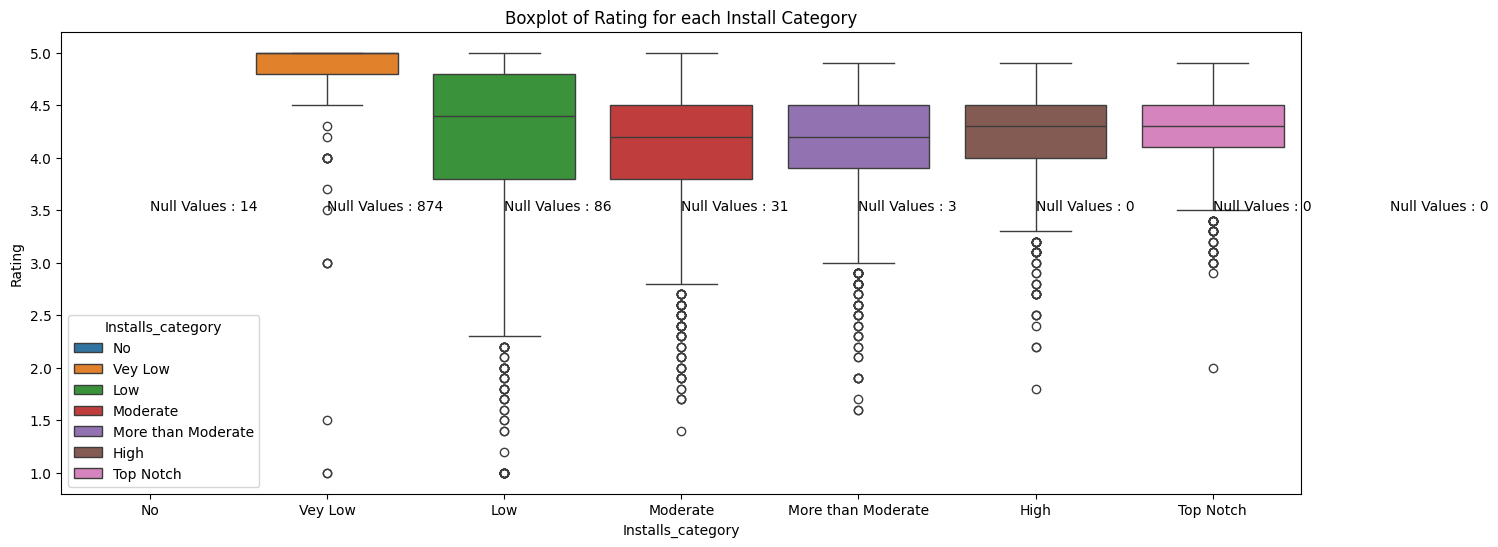

In [115]:
# Plot the boxplot of rating for each install_category
plt.figure(figsize=(16, 6))
sns.boxplot(x='Installs_category', y='Rating',hue='Installs_category',data=df)

# Add the text for total null values in each category (corrected: plt.text instead of plt.Text)
plt.text(0, 3.5, 'Null Values : 14')
plt.text(1, 3.5, 'Null Values : 874')
plt.text(2, 3.5, 'Null Values : 86')
plt.text(3, 3.5, 'Null Values : 31')
plt.text(4, 3.5, 'Null Values : 3')
plt.text(5, 3.5, 'Null Values : 0')
plt.text(6, 3.5, 'Null Values : 0')
plt.text(7, 3.5, 'Null Values : 0')

plt.title('Boxplot of Rating for each Install Category')  # Set the title of the plot
plt.show()  # Display the plot

<Axes: xlabel='Installs_category', ylabel='Reviews'>

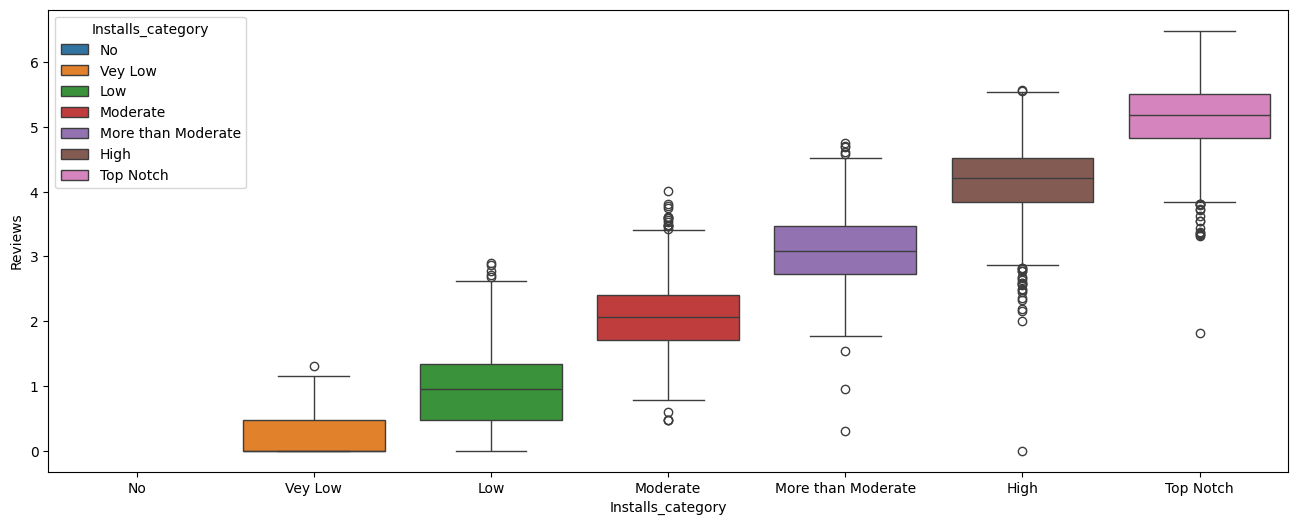

In [120]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Installs_category',y=np.log10(df['Reviews']),hue='Installs_category',data=df) 

<Axes: xlabel='Rating', ylabel='Reviews'>

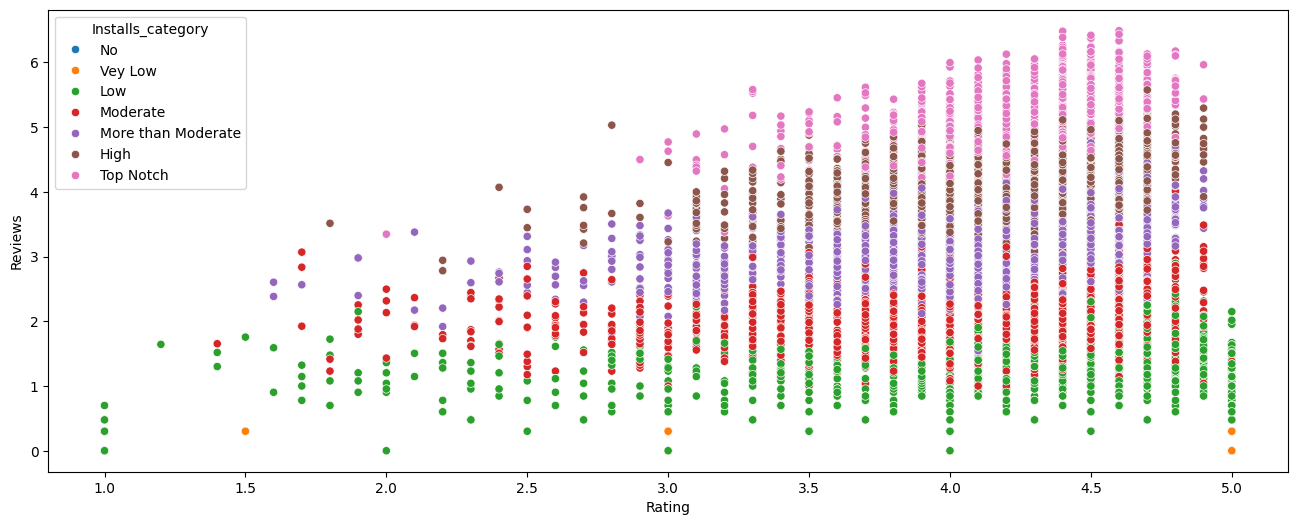

In [126]:
# scatter plot of rating and reviews with installs category
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Rating',y=np.log10(df['Reviews']),hue='Installs_category',data=df) # scatter plot of rating and reviews with installs category

<Axes: xlabel='Installs', ylabel='Reviews'>

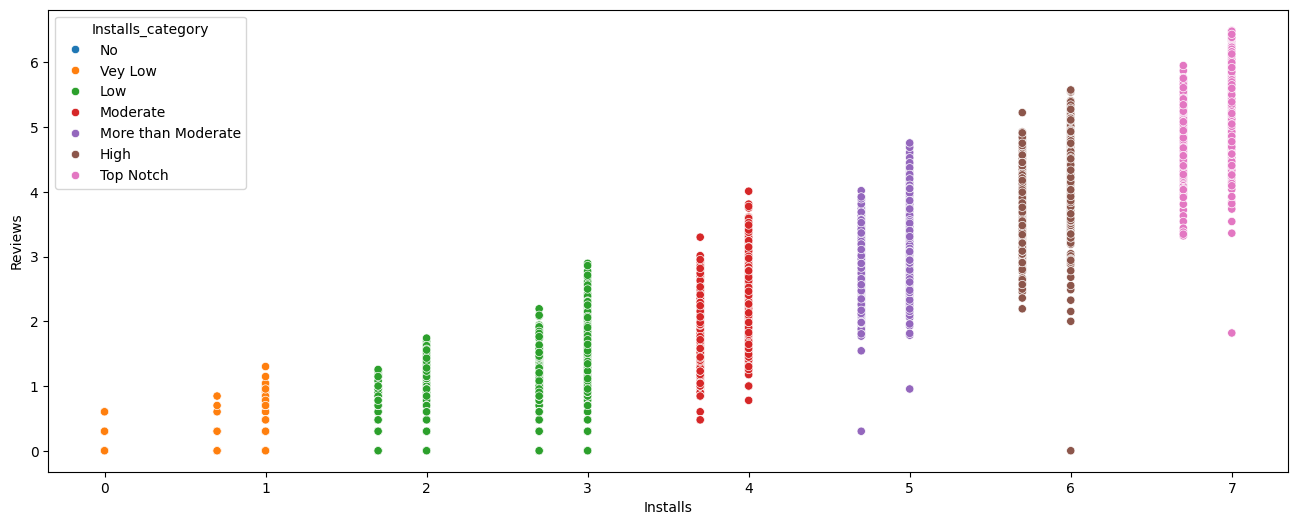

In [127]:
# scatter plot of rating and reviews with installs category
plt.figure(figsize=(16, 6))
sns.scatterplot(x=np.log10(df['Installs']),y=np.log10(df['Reviews']),hue='Installs_category',data=df) # scatter plot of rating and reviews with installs category

<Figure size 1600x600 with 0 Axes>

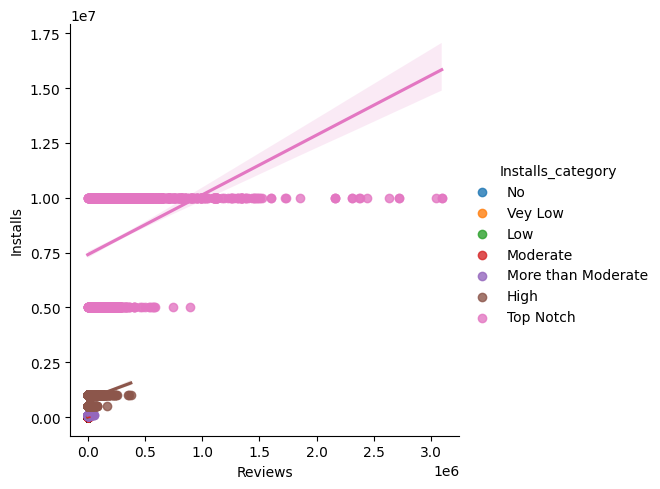

In [133]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Reviews',y='Installs',data=df,hue='Installs_category')

---
# 2.Remove Duplicates

In [138]:
for col in df.columns: 
    print(f"Total duplicates in {col} are : {df[col].duplicated().sum()}")

Total duplicates in App are : 1181
Total duplicates in Category are : 10796
Total duplicates in Rating are : 10789
Total duplicates in Reviews are : 4830
Total duplicates in Size_in_Bytes are : 10373
Total duplicates in Installs are : 10809
Total duplicates in Type are : 10827
Total duplicates in Price are : 10737
Total duplicates in Content Rating are : 10823
Total duplicates in Genres are : 10710
Total duplicates in Last Updated are : 9453
Total duplicates in Current Ver are : 7998
Total duplicates in Android Ver are : 10796
Total duplicates in Size_in_Mb are : 10373
Total duplicates in Installs_category are : 10821


In [ ]:
df[df['App'].duplicated(keep=False)].sort_values(by='App')

In [144]:
df.drop_duplicates(inplace=True)

In [147]:
print(f"Remaining Rows after drop duplicate : {df.shape[0]}") 

Remaining Rows after drop duplicate : 10346


___
# **3.Insights from data**

## **3.1. Which Category has highest apps ?**

In [154]:
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

## **3.2.Which Category has highest installs ?**

In [162]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

## **3.3.Which Category has highest Reviews ?**

In [163]:
df.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

## **3.4.Which Category has highest Rating ?**

In [165]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

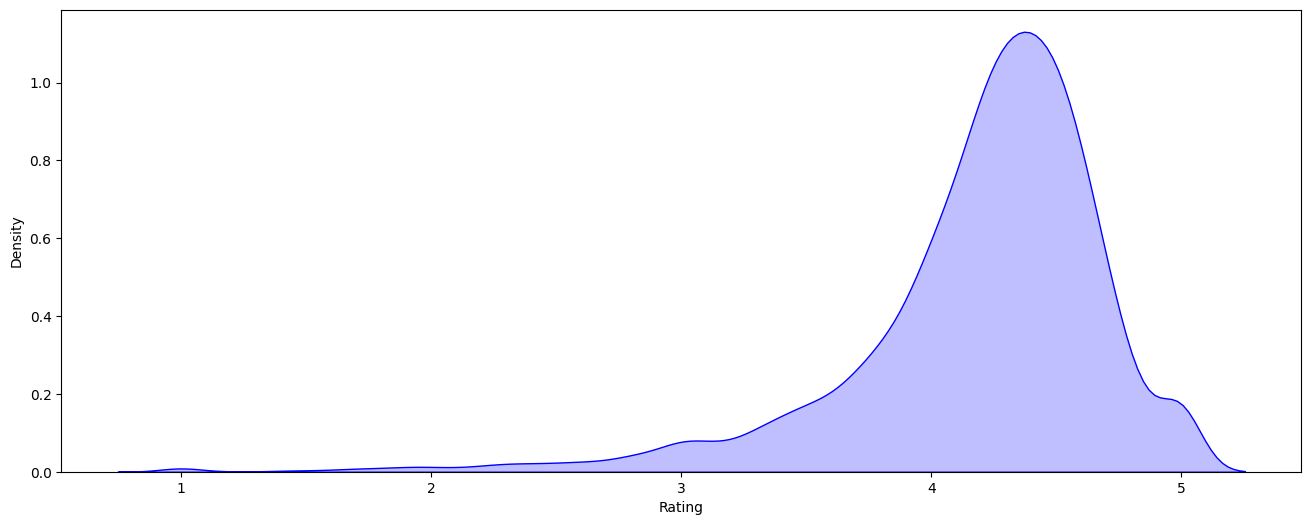

In [168]:
plt.figure(figsize=(16,6))
sns.kdeplot(df['Rating'],color='blue',shade=True)

---
# **Assignment :** 
## *1.Remove Null Values from Rating Column by average of every install category* 
## *2.Make 15 questions and Inspect the data and plot the graph* 

In [173]:
df['Category'].value_counts()

Category
FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           64
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

In [175]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

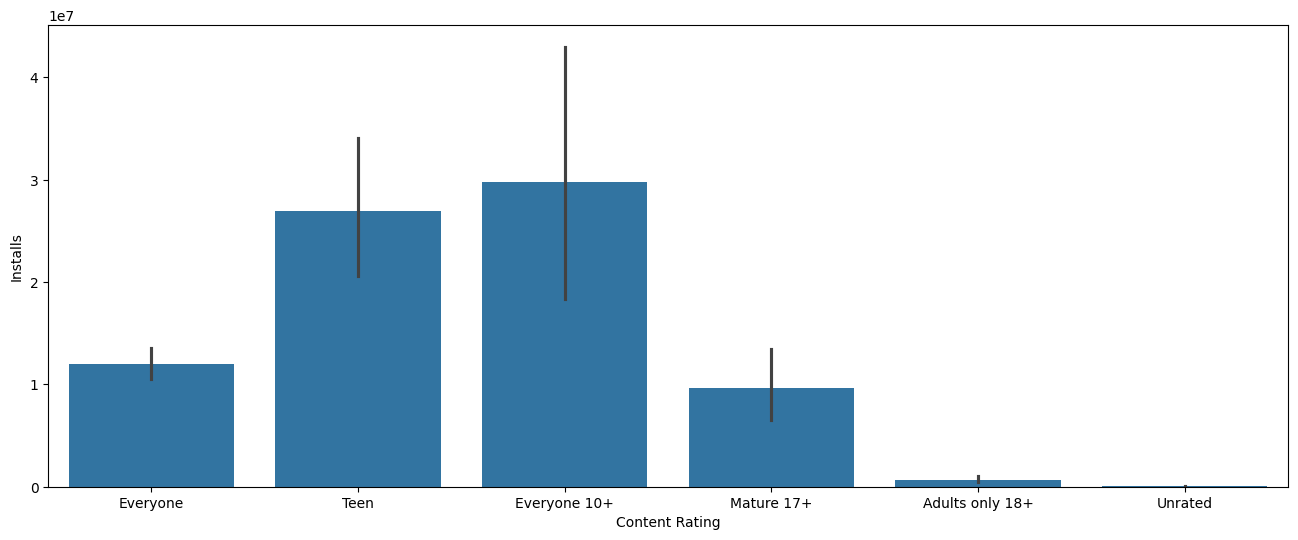

In [179]:
plt.figure(figsize=(16,6))
sns.barplot(x='Content Rating',y='Installs',data=df)

In [ ]:
df['Category'].loc[df['Content Rating']=='Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
SPORTS                  318
PERSONALIZATION         318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
WEATHER                  78
HOUSE_AND_HOME           78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

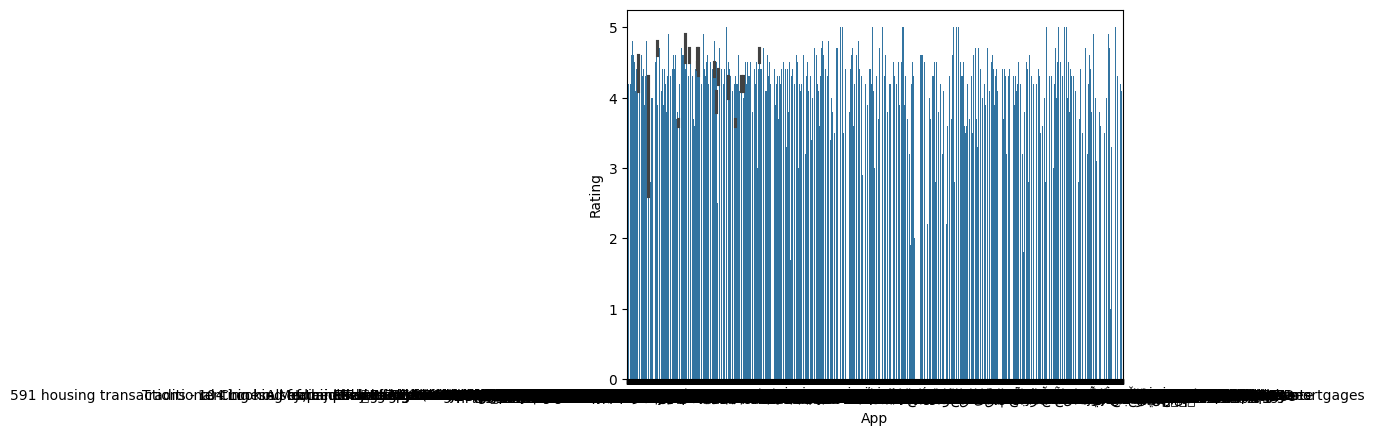

In [183]:
plt.Figure(figsize=(16,6))
sns.barplot(x='App',y='Rating',data=df[df['Type']=='Paid'].sort_values(by='Rating',ascending=False).head(5))